# Hadamard and Measure

In [1]:
from qiskit import *
%pylab inline
matplotlib.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [2]:
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {
    "thermal_factor": 1.,
    "decoherence_factor": 1.,
    "depolarization_factor": 1.,
    "bell_depolarization_factor": 1.,
    "decay_factor": 1.,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.]
}
options_noisy = {
    "thermal_factor": 0.,
    "decoherence_factor": 0.9,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.8,
    "rotation_error": {'rx':[.5, 0.5], 'ry':[.5, 0.5], 'rz': [.9, 0.5]},
    "tsp_model_error": [0.5, 0.5]
    }

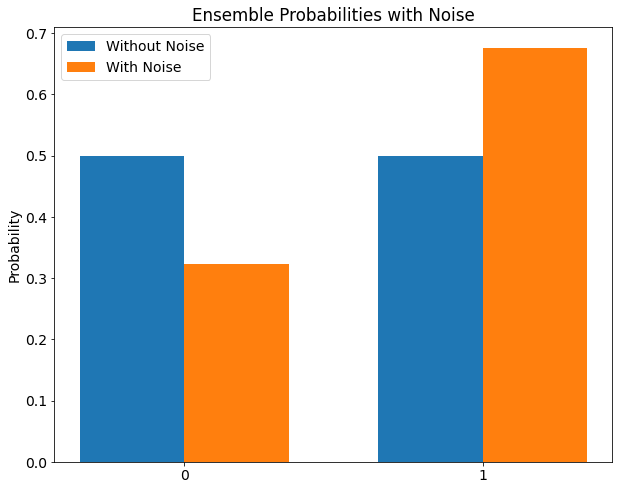

In [5]:
h1_qc = QuantumCircuit(1,1)
h1_qc.h(0)
h1_qc.measure(0,0,basis='Ensemble', add_param='Z')

run = execute(h1_qc,backend,**options)
result = run.result()
run_error = execute(h1_qc,backend,**options_noisy)
result_error = run_error.result()
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob_error = result_error['results'][0]['data']['ensemble_probability']

labels = prob.keys()
without_noise = prob.values()
with_noise = prob_error.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(ylabel='Probability', title='Ensemble Probabilities with Noise', xticks=x, xticklabels=labels)
ax.legend()
plt.show()

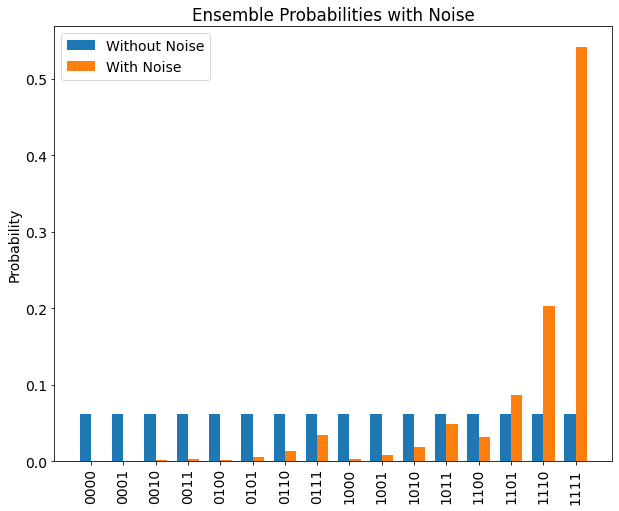

In [4]:
num_qubits = 4
h1_qc = QuantumCircuit(num_qubits,1)
h1_qc.h(range(num_qubits))
h1_qc.measure(0,0,basis='Ensemble', add_param='Z')

run = execute(h1_qc,backend,**options)
result = run.result()
run_error = execute(h1_qc,backend,**options_noisy)
result_error = run_error.result()
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob_error = result_error['results'][0]['data']['ensemble_probability']

labels = prob.keys()
without_noise = prob.values()
with_noise = prob_error.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set(ylabel='Probability', title='Ensemble Probabilities with Noise', xticks=x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()
plt.show()